# ROMS-TOOLS setup for Iceland3_MARBL_2024

First step is to set up the outer grid using ROMS-TOOLS and save the grid file.

In [1]:
from roms_tools import Grid
import xarray as xr

In [2]:
project='/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland3_MARBL_2024/'
datasets='/anvil/projects/x-ees250129/Datasets_subset/'
model_name='Iceland3'
child_name='Iceland4'
grid_path='/anvil/projects/x-ees250129/x-uheede/MATLAB/setup_r2r_phys+bgc/1.Make_grid/Iceland3_grid_MAT.nc'

In [3]:
#%%time

#grid = Grid(
#    nx=640,
#    ny=386,
#    size_x=32,
#    size_y=19.2,
#    center_lon=-21.68,
#    center_lat=64.325,
#    rot=0,
#    topography_source={
#        "name": "SRTM15",
#        "path": datasets+"SRTM15/SRTM15_V2.6.nc"},
#    N=40  # number of vertical layers
#)

In [3]:
grid = Grid.from_file(grid_path)

2025-11-19 18:09:19 - WARNING - Vertical coordinates (Cs_r, Cs_w) not found in grid file.
2025-11-19 18:09:19 - INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
2025-11-19 18:09:19 - INFO - Total time: 0.004 seconds
2025-11-19 18:09:19 - INFO - ========================================================================================================


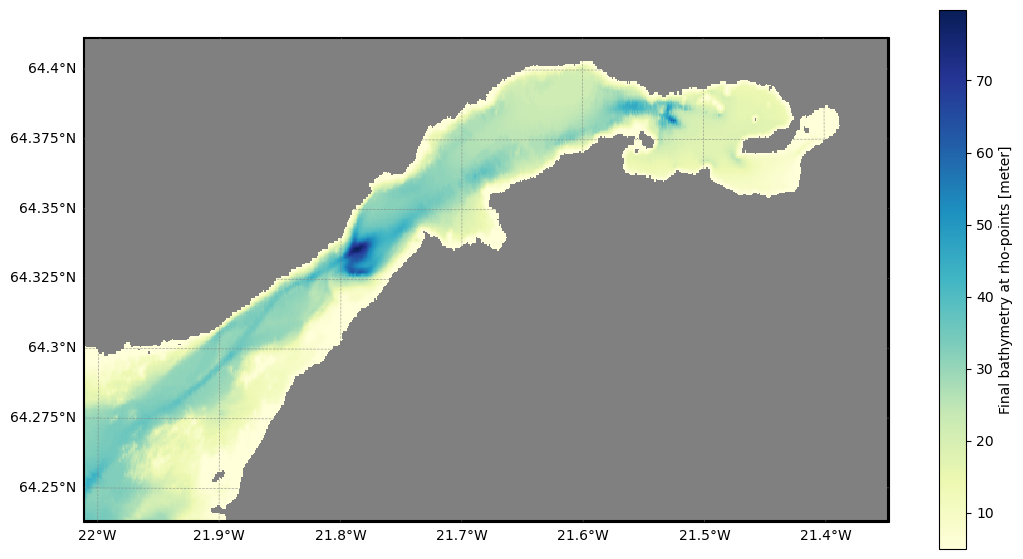

In [5]:
grid.plot()

In [6]:
filepath = project+model_name+'_grid.nc'

In [22]:
grid.update_vertical_coordinate(N=60, theta_s=5.0, theta_b=5.0, hc=5.0, verbose=False)

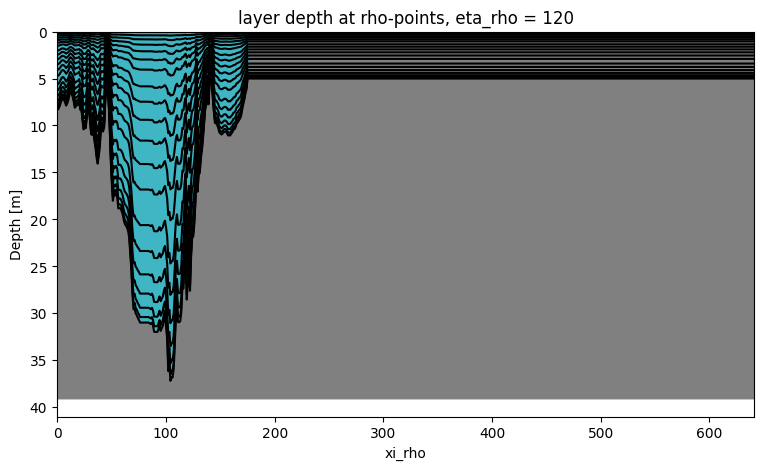

In [23]:
grid.plot_vertical_coordinate(eta=120, max_nr_layer_contours=20)

In [8]:
grid.save(filepath)

2025-10-30 15:17:53 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_grid.nc


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_grid.nc')]

In [6]:
grid.ds

<xarray.Dataset> Size: 29MB
Dimensions:       (one: 1, eta_rho: 386, xi_rho: 642, xi_u: 641, eta_v: 385,
                   eta_coarse: 194, xi_coarse: 322, s_rho: 100, s_w: 101)
Coordinates:
    lon_rho       (eta_rho, xi_rho) float64 2MB ...
    lat_rho       (eta_rho, xi_rho) float64 2MB ...
    lat_u         (eta_rho, xi_u) float64 2MB 64.24 64.24 64.24 ... 64.41 64.41
    lon_u         (eta_rho, xi_u) float64 2MB 338.0 338.0 338.0 ... 338.7 338.7
    lat_v         (eta_v, xi_rho) float64 2MB 64.24 64.24 64.24 ... 64.41 64.41
    lon_v         (eta_v, xi_rho) float64 2MB 338.0 338.0 338.0 ... 338.7 338.7
    lat_coarse    (eta_coarse, xi_coarse) float64 500kB 64.24 64.24 ... 64.41
    lon_coarse    (eta_coarse, xi_coarse) float64 500kB 338.0 338.0 ... 338.7
Dimensions without coordinates: one, eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/20)
    spherical     (one) |S1 1B ...
    angle         (eta_rho, xi_rho) float64 2MB ...
    h             (eta_rho, xi_rho) float64 2MB ...
    hraw          (eta_rho, xi_rho) float64 2MB ...
    f             (eta_rho, xi_rho) float64 2MB ...
    pm            (eta_rho, xi_rho) float64 2MB ...
    ...            ...
    angle_coarse  (eta_coarse, xi_coarse) float64 500kB 0.005199 ... -0.005232
    mask_coarse   (eta_coarse, xi_coarse) int32 250kB 1 1 1 1 1 1 ... 0 0 0 0 0
    sigma_r       (s_rho) float32 400B -0.995 -0.985 -0.975 ... -0.015 -0.005
    Cs_r          (s_rho) float32 400B -0.992 -0.9753 ... -8.89e-05 -9.874e-06
    sigma_w       (s_w) float32 404B -1.0 -0.99 -0.98 -0.97 ... -0.02 -0.01 0.0
    Cs_w          (s_w) float32 404B -1.0 -0.9837 -0.9667 ... -3.95e-05 0.0
Attributes:
    Title:     ROMS grid by Easy Grid. Settings: nx: 640 ny: 384 xsize: 32 ys...
    Date:      09-Oct-2025
    Type:      ROMS grid produced by Easy Grid
    straddle:  False
    theta_s:   5.0
    theta_b:   2.0
    hc:        300.0

In [9]:
tpxo_path = datasets+"TPXO/TPXO10.v2/"
tpxo_dict = {
    "grid": tpxo_path + "grid_tpxo10v2.nc",
    "h": tpxo_path + "h_tpxo10.v2.nc",
    "u": tpxo_path + "u_tpxo10.v2.nc",
}

Next, we set up tidal forcing:

In [10]:
from roms_tools import TidalForcing

In [8]:
from datetime import datetime

In [12]:
model_reference_date = datetime(2000, 1, 1)

In [13]:

tidal_forcing = TidalForcing(
    grid=grid,
    source={"name": "TPXO", "path": tpxo_dict},
    ntides=15,  # Number of constituents to consider <= 15. Default is 10.
    model_reference_date=model_reference_date,  # Model reference date. Default is January 1, 2000.
    use_dask=True
)

2025-10-30 15:17:56 - INFO - Applying 2D horizontal fill to the source data before regridding.
2025-10-30 15:17:56 - INFO - Applying 2D horizontal fill to the source data before regridding.
2025-10-30 15:17:56 - INFO - Applying 2D horizontal fill to the source data before regridding.
2025-10-30 15:17:56 - INFO - Applying 2D horizontal fill to the source data before regridding.


In [14]:
filepath = project+model_name+"_tides.nc"

In [15]:
%time tidal_forcing.save(filepath)

2025-10-30 15:17:57 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_tides.nc


[########################################] | 100% Completed | 7.56 ss
CPU times: user 3.13 s, sys: 1.19 s, total: 4.32 s
Wall time: 7.69 s


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_tides.nc')]

For the surface forcing, we use ERA5 plus the unified BGC dataset

In [16]:
from roms_tools import Grid, SurfaceForcing

In [17]:
start_time = datetime(2023, 12, 1)
end_time = datetime(2024, 12, 31)

In [18]:
surface_forcing_kwargs = {
    "grid": grid,
    "start_time": start_time,
    "end_time": end_time,
    "type": "physics",
    "model_reference_date": datetime(2000, 1, 1), # this is the default
}

In [19]:
%%time

surface_forcing = SurfaceForcing(
    **surface_forcing_kwargs,
    source={"name": "ERA5"},
    use_dask=True,
)

2025-10-30 15:18:05 - INFO - No path specified for ERA5 source; defaulting to ARCO ERA5 dataset on Google Cloud.
2025-10-30 15:20:15 - INFO - Data will be interpolated onto the grid coarsened by factor 2. Remember to set `interp_frc = 1` in your `bulk_frc.opt` ROMS option file.
2025-10-30 15:20:16 - INFO - Applying 2D horizontal fill to the source data before regridding.
2025-10-30 15:20:20 - INFO - Applying 2D horizontal fill to the source data before regridding.


CPU times: user 4min 5s, sys: 9.95 s, total: 4min 15s
Wall time: 4min 19s


[########################################] | 100% Completed | 303.05 ms


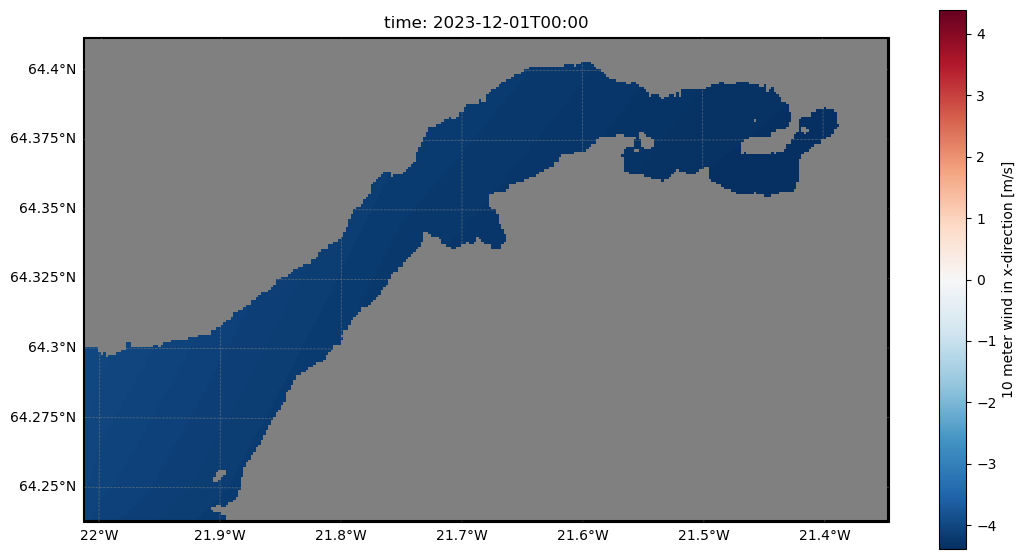

In [20]:
surface_forcing.plot("uwnd", time=0)

In [21]:
#cesm_bgc_path = "/global/cfs/projectdirs/m4746/Datasets/CESM_REGRIDDED/CESM-surface_lowres_regridded.nc"
unified_bgc_path = datasets+"UNIFIED/BGCdataset.nc"

In [22]:
%%time

unified_bgc_surface_forcing = SurfaceForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    source={"name": "UNIFIED", "path": unified_bgc_path, "climatology": True},
    type="bgc",
    use_dask=True,
)

2025-10-30 15:22:28 - INFO - Data will be interpolated onto the grid coarsened by factor 2. Remember to set `interp_frc = 1` in your `bgc.opt` ROMS option file.
2025-10-30 15:22:28 - INFO - 2D horizontal fill is skipped because source data already contains filled values.


CPU times: user 142 ms, sys: 6.98 ms, total: 149 ms
Wall time: 415 ms


In [23]:
filepath = project+model_name+"_surface_forcing2024.nc"

In [24]:
%time surface_forcing.save(filepath, group=True)

2025-10-30 15:22:37 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202312.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202401.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202402.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202403.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202404.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202405.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202406.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202407.nc
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Ic

[########################################] | 100% Completed | 75.57 s
[########################################] | 100% Completed | 75.51 s
[########################################] | 100% Completed | 72.68 s
[########################################] | 100% Completed | 79.46 s
[########################################] | 100% Completed | 74.93 s
[########################################] | 100% Completed | 75.64 s
[########################################] | 100% Completed | 73.64 s
[########################################] | 100% Completed | 77.68 s
[########################################] | 100% Completed | 76.58 s
[########################################] | 100% Completed | 76.22 s
[########################################] | 100% Completed | 77.83 s
[########################################] | 100% Completed | 73.82 s
[########################################] | 100% Completed | 76.30 s
CPU times: user 27min 9s, sys: 4min 12s, total: 31min 22s
Wall time: 19min 36s


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202312.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202401.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202402.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202403.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202404.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202405.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202406.nc'),
 PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_surface_forcing2024_202407.nc'),
 PosixPath('/anv

In [25]:
filepath = project+model_name+"_bgc_surface_forcing.nc"

In [26]:
%time unified_bgc_surface_forcing.save(filepath)

2025-10-30 15:42:05 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_bgc_surface_forcing_clim.nc


[########################################] | 100% Completed | 206.30 ms
CPU times: user 190 ms, sys: 18.2 ms, total: 208 ms
Wall time: 242 ms


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_bgc_surface_forcing_clim.nc')]

Next we generate the initial file

In [27]:
from roms_tools import RiverForcing, Grid

In [28]:
from datetime import datetime

In [29]:
start_time = datetime(2024, 1, 1)
end_time = datetime(2024, 12, 31)

In [30]:
river_forcing = RiverForcing(
    grid=grid,
    start_time=start_time,
    end_time=end_time,
    model_reference_date=datetime(2000, 1, 1), # this is the default
    include_bgc=True,
    source = {
    "name": "DAI",
    "path": "/anvil/projects/x-ees250129/Datasets_subset/Iceland_river_dataset/Hvalfjordur_rivers_2024.nc",
    "climatology": False
}
    
)

2025-10-30 15:42:05 - INFO - No river indices provided. Identify all rivers within the ROMS domain and assign each of them to the nearest coastal point.
2025-10-30 15:42:05 - WARNING - No records found at or before the start_time.
2025-10-30 15:42:05 - WARNING - No records found at or after the end_time.
2025-10-30 15:42:06 - INFO - Creating 2 synthetic river(s) to handle overlapping entries.


In [31]:
river_forcing.ds

<xarray.Dataset> Size: 2MB
Dimensions:           (nriver: 16, river_time: 12, ntracers: 34, eta_rho: 386,
                       xi_rho: 642)
Coordinates:
    river_name        (nriver) object 128B 'HVAL1' 'HVAL2' ... 'overlap_2'
  * nriver            (nriver) int64 128B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
    abs_time          (river_time) datetime64[ns] 96B 2024-01-15 ... 2024-12-15
  * river_time        (river_time) float64 96B 8.78e+03 8.811e+03 ... 9.115e+03
    tracer_name       (ntracers) <U11 1kB 'temp' 'salt' ... 'diazP' 'diazFe'
    tracer_unit       (ntracers) <U15 2kB 'degrees Celsius' 'PSU' ... 'mmol/m^3'
    tracer_long_name  (ntracers) <U43 6kB 'potential temperature' ... 'diazot...
Dimensions without coordinates: ntracers, eta_rho, xi_rho
Data variables:
    river_volume      (river_time, nriver) float64 2kB 0.09365 0.1489 ... 1.691
    river_tracer      (river_time, ntracers, nriver) float64 52kB 17.0 ... 1....
    river_index       (eta_rho, xi_rho) float32 991kB 0.0 0.0 0.0 ... 0.0 0.0
    river_fraction    (eta_rho, xi_rho) float32 991kB 0.0 0.0 0.0 ... 0.0 0.0

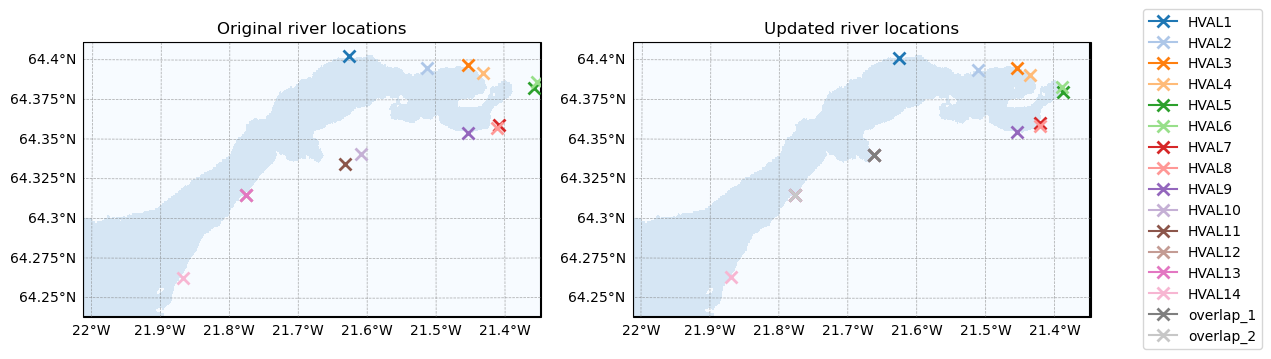

In [32]:
river_forcing.plot_locations()

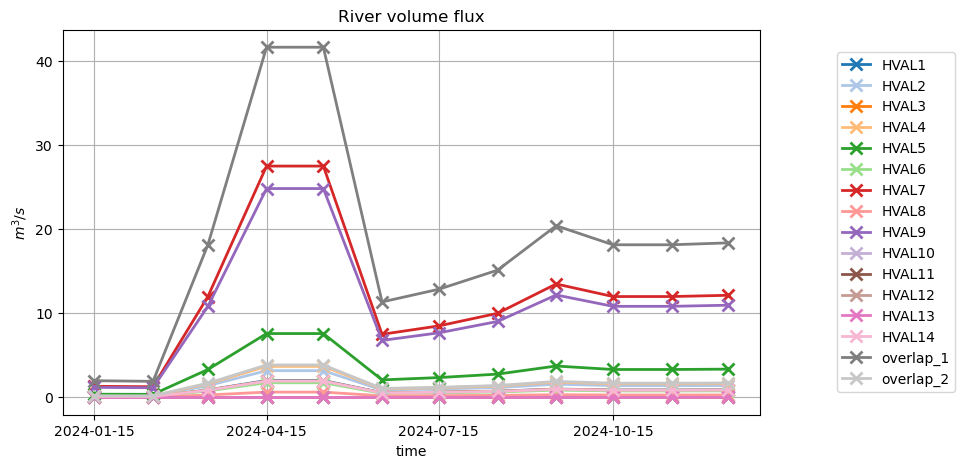

In [33]:
river_forcing.plot("river_volume")

In [34]:
filepath = project+model_name+"_rivers.nc"

In [35]:
river_forcing.save(filepath=filepath)

2025-10-30 15:42:08 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_rivers.nc


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland2_MARBL_2024/Iceland3_rivers.nc')]

In [38]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
riv=xr.open_dataset(filepath)
riv.load()

/tmp/ipykernel_269902/3130065273.py:5: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  riv=xr.open_dataset(filepath)


<xarray.Dataset> Size: 2MB
Dimensions:           (river_time: 12, nriver: 16, ntracers: 34, eta_rho: 386,
                       xi_rho: 642)
Coordinates:
    river_name        (nriver) object 128B 'HVAL1' 'HVAL2' ... 'overlap_2'
  * nriver            (nriver) int32 64B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
    abs_time          (river_time) datetime64[ns] 96B 2024-01-15 ... 2024-12-15
  * river_time        (river_time) timedelta64[ns] 96B 8780 days ... 9115 days
    tracer_name       (ntracers) object 272B 'temp' 'salt' ... 'diazP' 'diazFe'
    tracer_unit       (ntracers) object 272B 'degrees Celsius' ... 'mmol/m^3'
    tracer_long_name  (ntracers) object 272B 'potential temperature' ... 'dia...
Dimensions without coordinates: ntracers, eta_rho, xi_rho
Data variables:
    river_volume      (river_time, nriver) float64 2kB 0.09365 0.1489 ... 1.691
    river_tracer      (river_time, ntracers, nriver) float64 52kB 17.0 ... 1....
    river_index       (eta_rho, xi_rho) float32 991kB 0.0 0.0 0.0 ... 0.0 0.0
    river_fraction    (eta_rho, xi_rho) float32 991kB 0.0 0.0 0.0 ... 0.0 0.0

In [39]:
# Create new array
new_tracer = np.zeros_like(riv['river_tracer'].values)

# Temperature varies sinusoidally with time
temp = 10 * np.sin(np.linspace(0, np.pi, riv.dims['river_time']))  # 12-month cycle

# Loop through tracers
for i, tracer in enumerate(riv['tracer_name'].values):
    if tracer == 'temp':
        new_tracer[:, i, :] = temp[:, np.newaxis]  # vary with time
    elif tracer == 'salt':
        new_tracer[:, i, :] = 1
    elif tracer == 'PO4':
        new_tracer[:, i, :] = 0.4
    elif tracer == 'NO3':
        new_tracer[:, i, :] = 6
    elif tracer == 'SiO3':
        new_tracer[:, i, :] = 3
    elif tracer == 'NH4':
        new_tracer[:, i, :] = 0.4
    elif tracer == 'Fe':
        new_tracer[:, i, :] = 0.000197
    elif tracer == 'Lig':
        new_tracer[:, i, :] = 0.000465    
    elif tracer == 'O2':
        new_tracer[:, i, :] = 360    
    elif tracer == 'DIC':
        new_tracer[:, i, :] = 313    
    elif tracer == 'DIC_ALT_CO2':
        new_tracer[:, i, :] = 313  
    elif tracer == 'ALK':
        new_tracer[:, i, :] = 282 
    elif tracer == 'ALK_ALT_CO2':
        new_tracer[:, i, :] = 282 
    else:
        new_tracer[:, i, :] = 0.0
riv['river_tracer'] = (riv['river_tracer'].dims, new_tracer)

/tmp/ipykernel_269902/608848569.py:5: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  temp = 10 * np.sin(np.linspace(0, np.pi, riv.dims['river_time']))  # 12-month cycle


In [40]:
riv.to_netcdf(project+model_name+"_rivers_modified.nc")

## CDR release

In [39]:
from roms_tools import VolumeRelease

In [55]:
times = [
    datetime(2024, 2, 17, 12, 0),
    datetime(2024, 2, 18, 12, 0),
    datetime(2024, 2, 19, 12, 0),
    datetime(2024, 2, 20, 12, 0),
    datetime(2024, 2, 21, 12, 0),
    datetime(2024, 2, 22, 12, 0),
    datetime(2024, 2, 23, 12, 0),
    datetime(2024, 2, 24, 12, 0),
    datetime(2024, 2, 25, 12, 0),
    datetime(2024, 2, 26, 12, 0),
    datetime(2024, 2, 27, 12, 0),
]

In [56]:
constant_volume_release_iceland = VolumeRelease(
    name="iceland_release",
    lat=64.394213,  # degree N
    lon=-21.465904,  # degree E
    depth=2,  # m
    times=times,
    volume_fluxes=[0,0.000583,0.000583,0.000583,0.000583,0,0,0,0,0,0],  # m3/s
    tracer_concentrations={
        "temp": 10.0,  # degrees C
        "salt": 1.0,  # psu
        "ALK": 1800000  # meq/m3
        },
    fill_values="zero"
)

In [57]:
constant_volume_release_iceland

VolumeRelease(name='iceland_release', lat=64.394213, lon=-21.465904, depth=2.0, hsc=0.0, vsc=0.0, times=[datetime.datetime(2024, 2, 17, 12, 0), datetime.datetime(2024, 2, 18, 12, 0), datetime.datetime(2024, 2, 19, 12, 0), datetime.datetime(2024, 2, 20, 12, 0), datetime.datetime(2024, 2, 21, 12, 0), datetime.datetime(2024, 2, 22, 12, 0), datetime.datetime(2024, 2, 23, 12, 0), datetime.datetime(2024, 2, 24, 12, 0), datetime.datetime(2024, 2, 25, 12, 0), datetime.datetime(2024, 2, 26, 12, 0), datetime.datetime(2024, 2, 27, 12, 0)], release_type=<ReleaseType.volume: 'volume'>, fill_values='zero', volume_fluxes=Flux(name='volume', values=[0.0, 0.000583, 0.000583, 0.000583, 0.000583, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), tracer_concentrations={'temp': Concentration(name='temp', values=10.0), 'salt': Concentration(name='salt', values=1.0), 'ALK': Concentration(name='ALK', values=1800000.0), 'PO4': Concentration(name='PO4', values=0.0), 'NO3': Concentration(name='NO3', values=0.0), 'SiO3': Concentra

In [58]:
from roms_tools import CDRForcing

In [59]:
start_time_release = datetime(2024, 2, 17)
end_time_release = datetime(2024, 2, 28)

In [60]:
cdr_forcing_with_volume_releases = CDRForcing(
    grid=grid,
    start_time=start_time_release,
    end_time=end_time_release,
    model_reference_date=datetime(2000, 1, 1), # this is the default
    releases=[
        constant_volume_release_iceland],
)

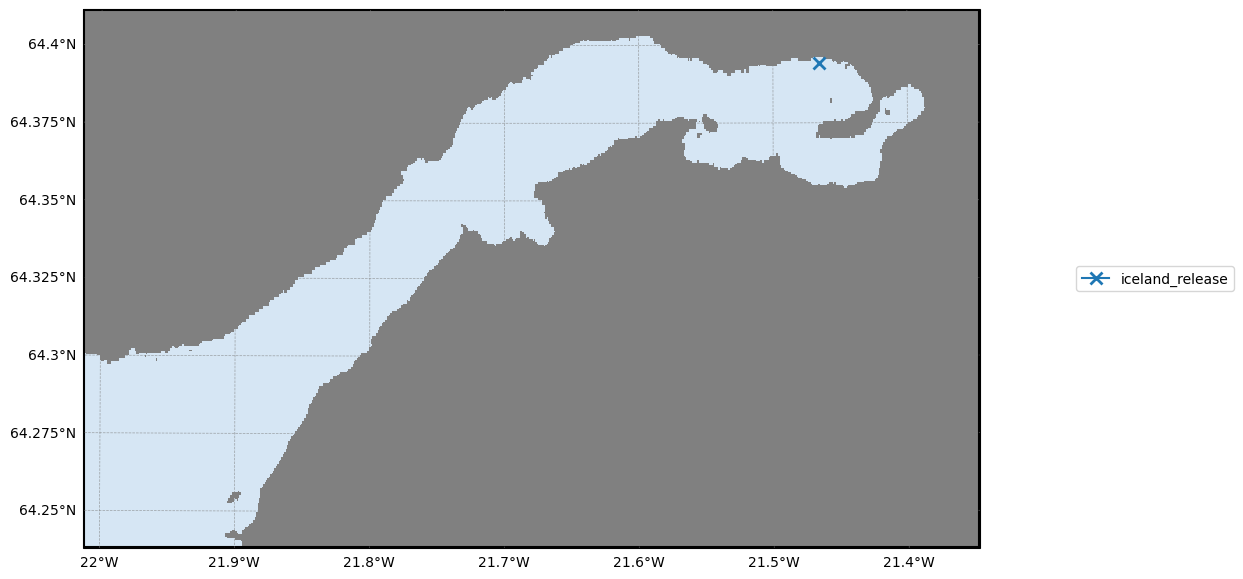

In [61]:
cdr_forcing_with_volume_releases.plot_locations()  # By default, this plots all available releases (but max 20).


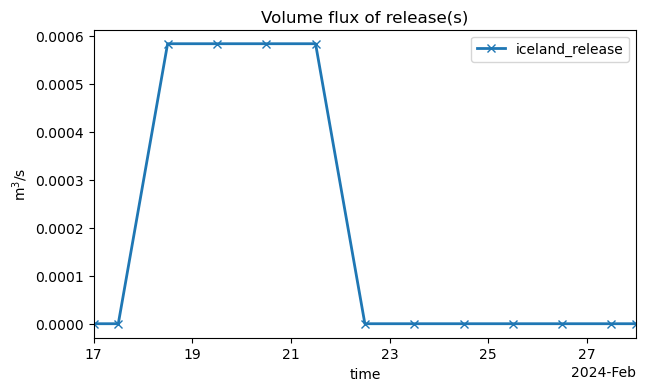

In [62]:
cdr_forcing_with_volume_releases.plot_volume_flux()

In [63]:
filepath = project+model_name+'_cdr_forcing.nc'

In [64]:
cdr_forcing_with_volume_releases.save(filepath=filepath)

2025-11-13 14:52:44 - INFO - Writing the following NetCDF files:
/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland3_MARBL_2024/Iceland3_cdr_forcing.nc


[PosixPath('/anvil/projects/x-ees250129/x-uheede/INPUT_files/Iceland3_MARBL_2024/Iceland3_cdr_forcing.nc')]

In [66]:
from roms_tools import partition_netcdf

In [67]:
partition_netcdf(filepath, 16, 16,'/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/P_INPUT')

[PosixPath('/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/P_INPUT/Iceland3_cdr_forcing.000.nc'),
 PosixPath('/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/P_INPUT/Iceland3_cdr_forcing.001.nc'),
 PosixPath('/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/P_INPUT/Iceland3_cdr_forcing.002.nc'),
 PosixPath('/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/P_INPUT/Iceland3_cdr_forcing.003.nc'),
 PosixPath('/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/P_INPUT/Iceland3_cdr_forcing.004.nc'),
 PosixPath('/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/P_INPUT/Iceland3_cdr_forcing.005.nc'),
 PosixPath('/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/P_INPUT/Iceland3_cdr_forcing.006.nc'),
 PosixPath('/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/P_INPUT/Iceland3_cdr_forcing.007.nc'),
 PosixPath('/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/P_INPUT/Iceland3_cdr_forcing.008.nc'),
 PosixPath('/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/P_INPUT/Iceland3_cdr_forcing.009.nc'),
 PosixPath('/home/x-uheede/S/Iceland3_MA